## **Diwali EDA**
#### **Problem Statement**
- With the upcoming Diwali season, there is a need to develop a comprehensive marketing strategy to maximise sales and optimize inventory management for a retail business.
- Based on historical sales data, the goal is to identify key regional trends, zone-wise strategies, product focus areas, insights from product ID's order frequency tactics and targeted demographic segments.
- The objective is to leverage this information to tailor marketing efforts inventory planning and promotional activities effectively ultimately driving higher sales during the Diwali period.

#### **Step1: Import Python Libraries**
The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the link to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins etc.

Pandas and Numpy are used for Data Manipulation and numerical calculations.

Matplotlib and Seaborn are used for Data Visualisations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\91938\OneDrive\Documents\Python Scripts\Exploratory Data Analysis\Diwali_Sales\Diwali.csv', encoding='unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


#### **Data Cleaning**
nunique() is based on several unique values in each column and the data description, we can identify the continuous and categorical 

In [7]:
df.nunique()

User_ID             3755
Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
Status                 0
unnamed1               0
dtype: int64

In [43]:
df['Orders'].sum()

np.int64(27981)

In [8]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')

User_ID : [1002903 1000732 1001990 ... 1001542 1004378 1005258]
Cust_name : ['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
Product_ID : ['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
Gender : ['F' 'M']
Age Group : ['26-35' '0-17' '18-25' '55+' '46-50' '51-55' '36-45']
Age : [28 35 16 25 61 26 34 20 46 24 48 29 54 19 30 53 83 33 40 39 32 36 55 27
 72 45 43 47 22 52 18 21 38 37 23 49 42 50 31 44 41 66 15 51 77 87 79 71
 88 58 82 62 92 12 63 17 13 67 90 56 75 81 64 73 84 14 76 86 89 68 91 85
 70 80 65 74 69 78 57 60 59]
Marital_Status : [0 1]
State : ['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Madhya Pradesh' 'Jharkhand' 'Kerala'
 'Haryana' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']
Zone : ['Western' 'Southern' 'Central' 'Northern' 'Eastern']
Occupation : ['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'IT Sector' 'Media' 'Banking' 'Retail'

#### **Missing Values Calculation**
isnull() is widely used in all pre-processing steps to identify null values in the data.

In our example, data.isnull().sum() is used to get the number of null or missing values.

In [9]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(8)

#### **Data Reduction**

In [11]:
df.drop(['User_ID', 'Status', 'unnamed1'], axis=1, inplace=True)

In [12]:
df.head()

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


#### **Handling the Inconsistency Errors**

In [13]:
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

In [14]:
df.isnull().sum()

Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(11243, 12)

#### **Feature Engineering**

In [18]:
df['Age Group'].unique()

array(['26-35', '0-17', '18-25', '55+', '46-50', '51-55', '36-45'],
      dtype=object)

In [19]:
df['Age_Category'] = df['Age Group'].replace({'0-17':'Teen', '18-25':'Young', '26-35':'Adult', '36-45':'Adult', '46-50':'Middle Age', '51-55':'Middle Age', '55+':'Senior'})

In [20]:
df['Gender'].replace({'F':'Female', 'M':'Male'}, inplace=True)

In [21]:
df.head()

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age_Category
0,Sanskriti,P00125942,Female,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,Adult
1,Kartik,P00110942,Female,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,Adult
2,Bindu,P00118542,Female,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,Adult
3,Sudevi,P00237842,Male,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,Teen
4,Joni,P00057942,Male,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,Adult


#### **Exploratory Data Analysis**
It refers to the crucial process of performing initial investigation on data to discover patterns 

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11243.0,35.422841,12.756369,12.0,27.0,33.0,43.0,92.0
Marital_Status,11243.0,0.420261,0.493623,0.0,0.0,0.0,1.0,1.0
Orders,11243.0,2.488749,1.114960,1.0,1.0,2.0,3.0,4.0
Amount,11243.0,9454.084476,5218.941128,188.0,5444.0,8111.0,12672.0,23952.0


In [23]:
df.describe(include='object').T

,count,unique,top,freq
Cust_name,11243,1250,Vishakha,42
Product_ID,11243,2351,P00265242,53
Gender,11243,2,Female,7838
Age Group,11243,7,26-35,4538
State,11243,16,Uttar Pradesh,1944
Zone,11243,5,Central,4294
Occupation,11243,15,IT Sector,1586
Product_Category,11243,18,Clothing & Apparel,2653
Age_Category,11243,5,Adult,6823


#### **Before we do EDA, lets separate Numerical and Categorical variables for easy analysis**

In [24]:
cat_cols = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print('Categorical Variables')
print(cat_cols)
print('Numerical Variables')
print(num_cols)

Categorical Variables
['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'State', 'Zone', 'Occupation', 'Product_Category', 'Age_Category']
Numerical Variables
['Age', 'Marital_Status', 'Orders', 'Amount']


#### **EDA Univarient Analysis**

Age


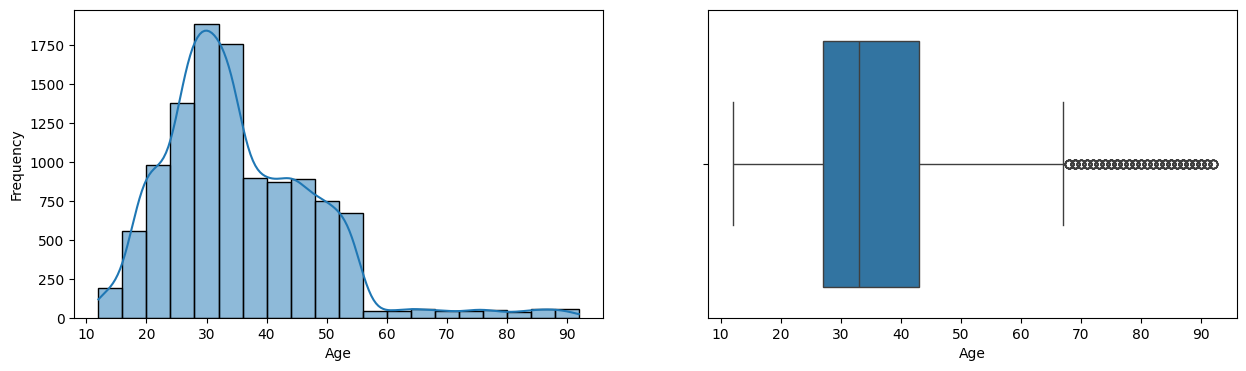

Marital_Status


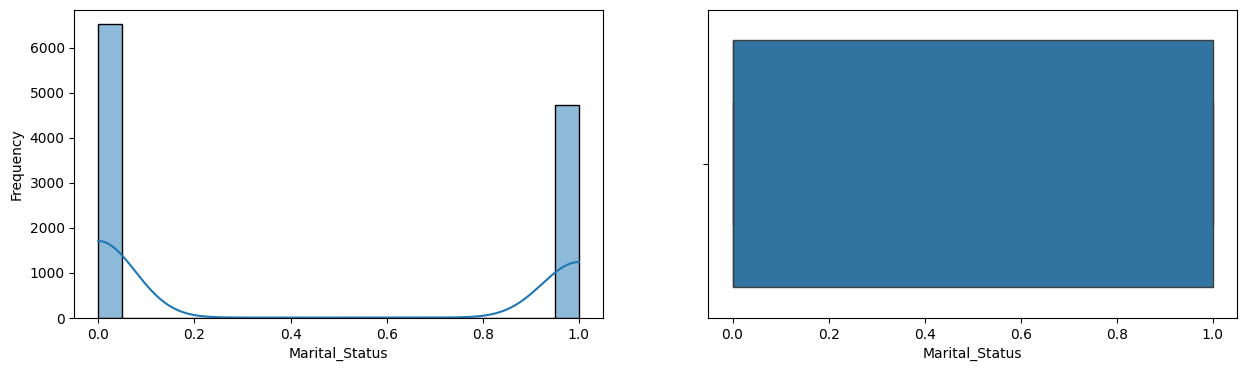

Orders


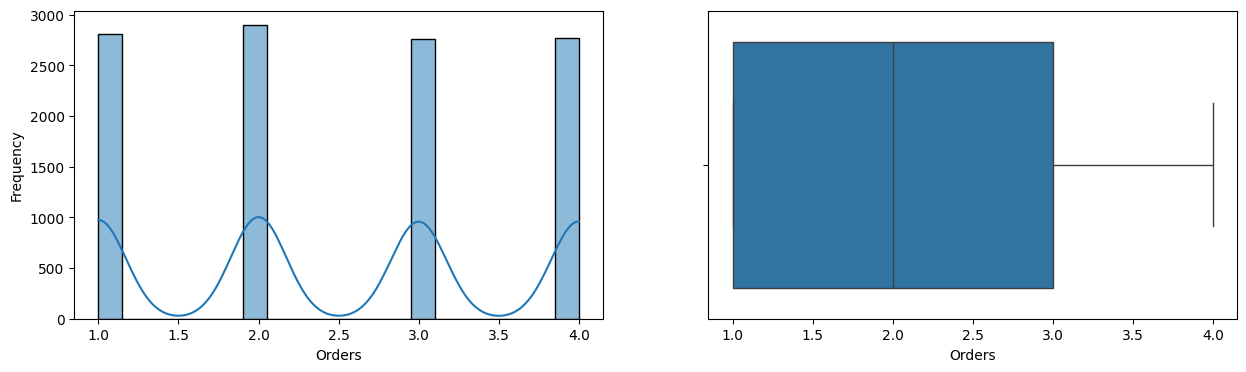

Amount


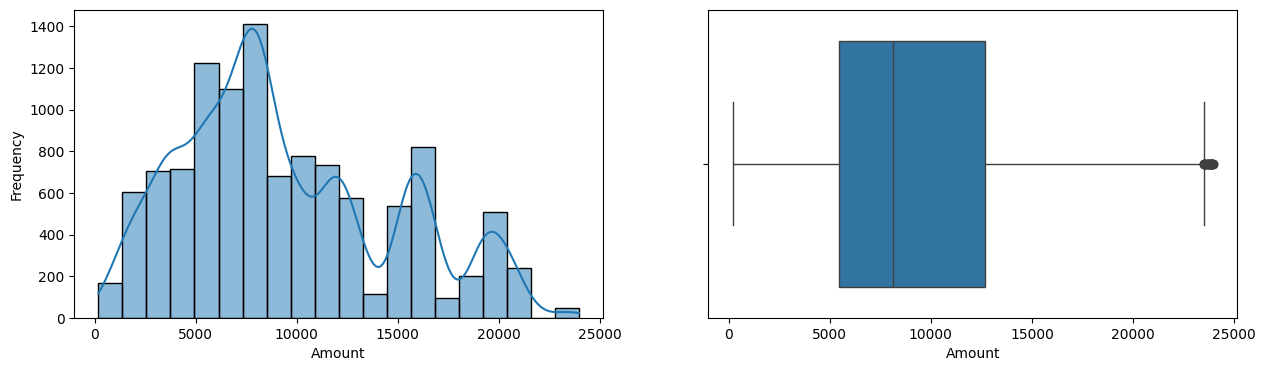

In [25]:
for col in num_cols:
    print(col)
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, alpha=0.5, bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    
    plt.show()

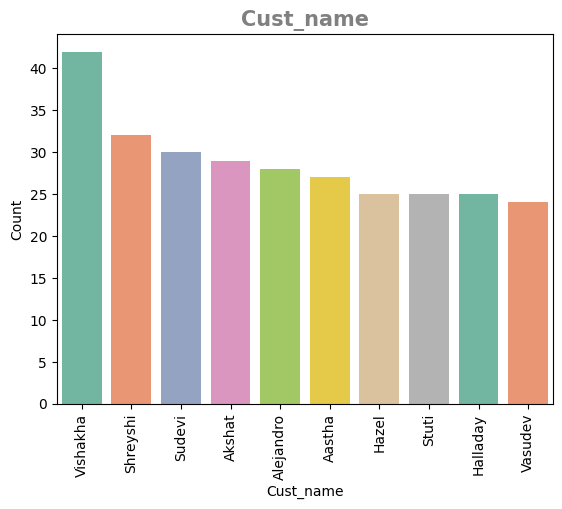

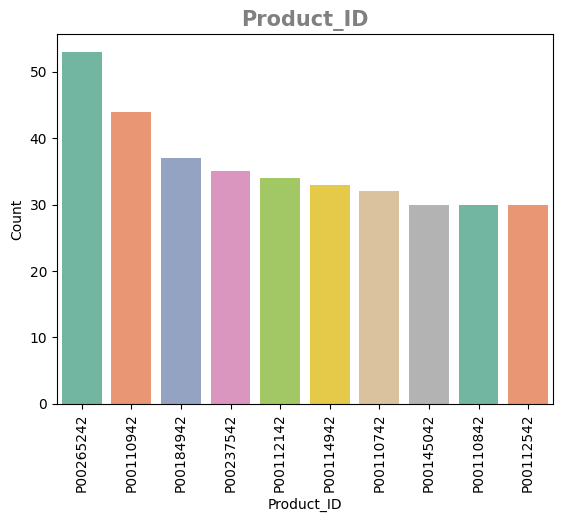

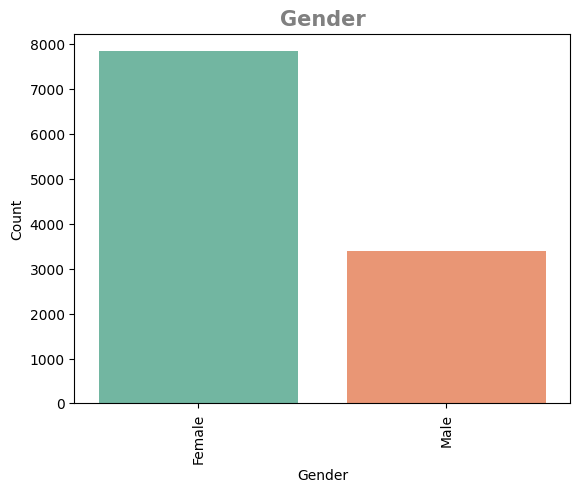

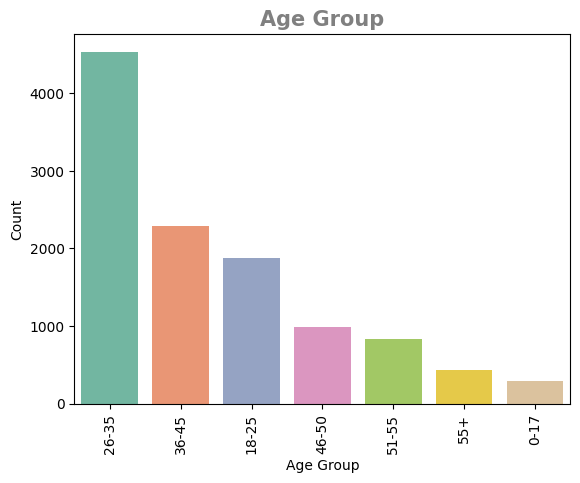

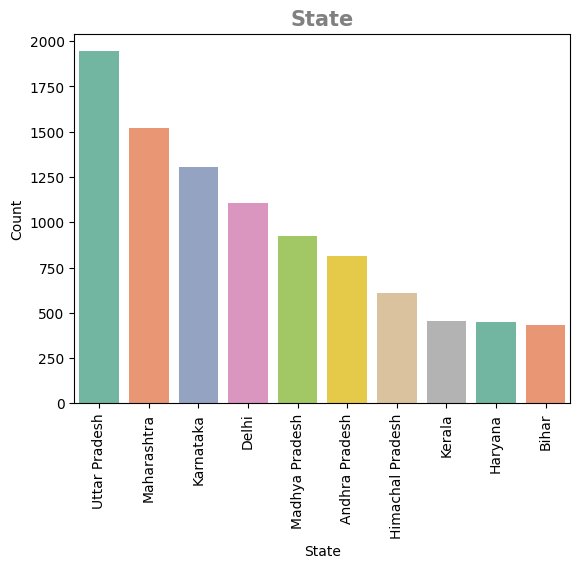

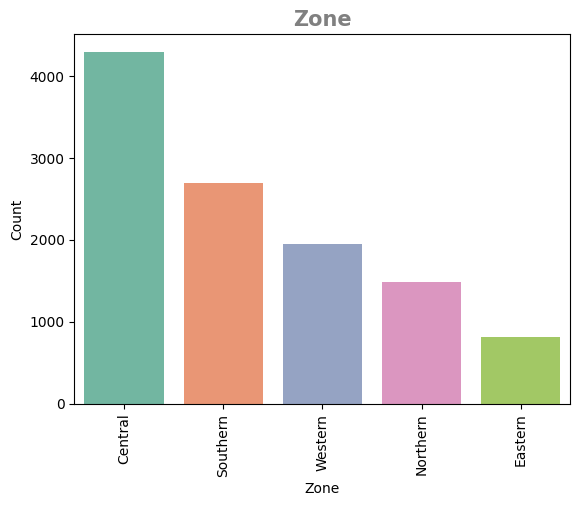

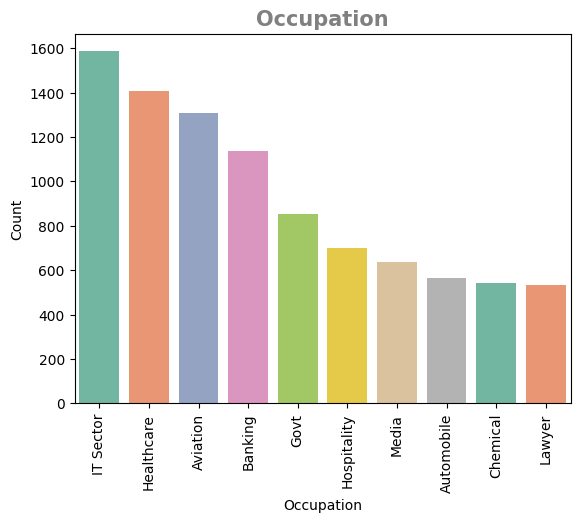

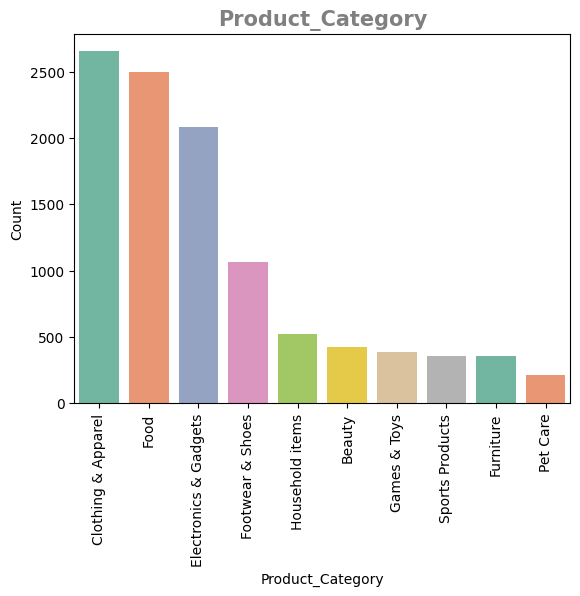

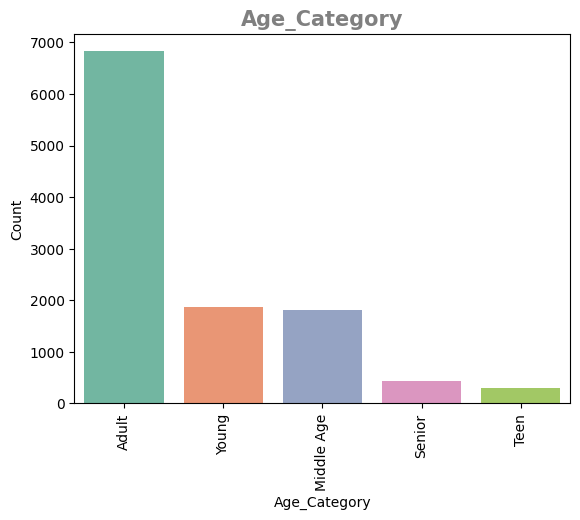

In [26]:
for col in cat_cols:
    sns.countplot(x=col, data=df, order=df[col].value_counts().head(10).index, palette='Set2')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.title(col, fontsize=15, fontweight='bold', color='grey')
    plt.show()

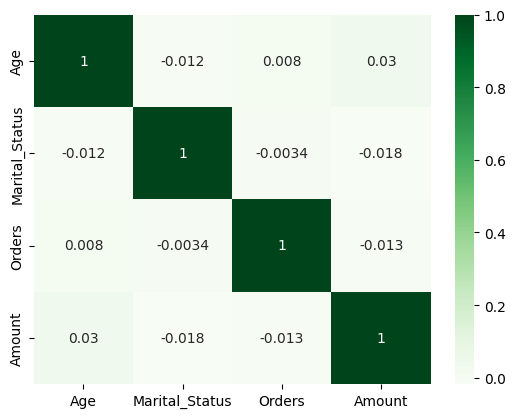

In [27]:
cor = df[num_cols].corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

#### **EDA Bivarient Analysis**
Now, lets move ahead with bivarient analysis. It helps to understand how variables are related to each other and the relationship b/w dependent and independent variables present in the dataset.

For Numerical variables, Pair Plots 
#### **Top Selling Products**

In [28]:
df.groupby(['Product_ID']).agg({'Amount':'sum'}).head(1)

,Amount
Product_ID,
P00000142,248716.0


In [29]:
top_selling = df[df['Product_ID'] == 'P00000142'].groupby('Product_Category')['Amount'].sum()
print(top_selling.max())

125793.0


In [30]:
df['Product_Category'].value_counts()

Product_Category
Clothing & Apparel       2653
Food                     2493
Electronics & Gadgets    2082
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       99
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

In [31]:
df['Product_ID'].value_counts().head()

Product_ID
P00265242    53
P00110942    44
P00184942    37
P00237542    35
P00112142    34
Name: count, dtype: int64

In [32]:
df['Product_ID'].value_counts().tail()

Product_ID
P00060142    1
P00267042    1
P00147142    1
P00317642    1
P00296942    1
Name: count, dtype: int64

In [33]:
search_title = 'P00265242'

# Perform the search
result = df[df['Product_ID'].str.contains(search_title, case=False)]
# Display the result
result

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age_Category
62,Bruce,P00265242,Female,26-35,33,0,Maharashtra,Western,Govt,Stationery,4,21325.0,Adult
208,Murray,P00265242,Female,46-50,50,1,Uttar Pradesh,Central,Banking,Furniture,1,20588.0,Middle Age
349,Ann,P00265242,Female,26-35,32,0,Karnataka,Southern,Retail,Footwear & Shoes,4,20260.0,Adult
591,Craig,P00265242,Female,55+,63,0,Madhya Pradesh,Central,Agriculture,Food,3,19487.0,Senior
812,Jeremy,P00265242,Female,18-25,20,1,Haryana,Northern,Food Processing,Food,4,19175.0,Young
963,Dipali,P00265242,Male,51-55,53,1,Gujarat,Western,Aviation,Food,1,18959.0,Middle Age
1309,Akshata,P00265242,Female,26-35,35,0,Delhi,Central,Food Processing,Footwear & Shoes,1,16506.0,Adult
1347,Hughes,P00265242,Female,36-45,38,0,Delhi,Central,Retail,Footwear & Shoes,2,16451.0,Adult
1561,Steven,P00265242,Female,0-17,12,0,Himachal Pradesh,Northern,Textile,Games & Toys,2,16149.0,Teen
1630,Cortes,P00265242,Female,55+,81,1,Madhya Pradesh,Central,IT Sector,Food,3,15917.0,Senior


In [34]:
print(f'Net Sales {round(df['Amount'].sum())}')

Net Sales 106292272


In [35]:
# Category with highest orders
total_order_ID = df.groupby('Product_ID')['Orders'].sum().nlargest(1)
total_order_ID

Product_ID
P00265242    127
Name: Orders, dtype: int64

In [36]:
total_order_zone = df.groupby('Zone')['Orders'].sum().sort_values(ascending=False)
total_order_zone

Zone
Central     10636
Southern     6744
Western      4866
Northern     3724
Eastern      2011
Name: Orders, dtype: int64

In [42]:
df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)

State
Uttar Pradesh       4809
Maharashtra         3799
Karnataka           3241
Delhi               2744
Madhya Pradesh      2259
Andhra Pradesh      2054
Himachal Pradesh    1568
Kerala              1137
Haryana             1106
Gujarat             1067
Name: Orders, dtype: int64

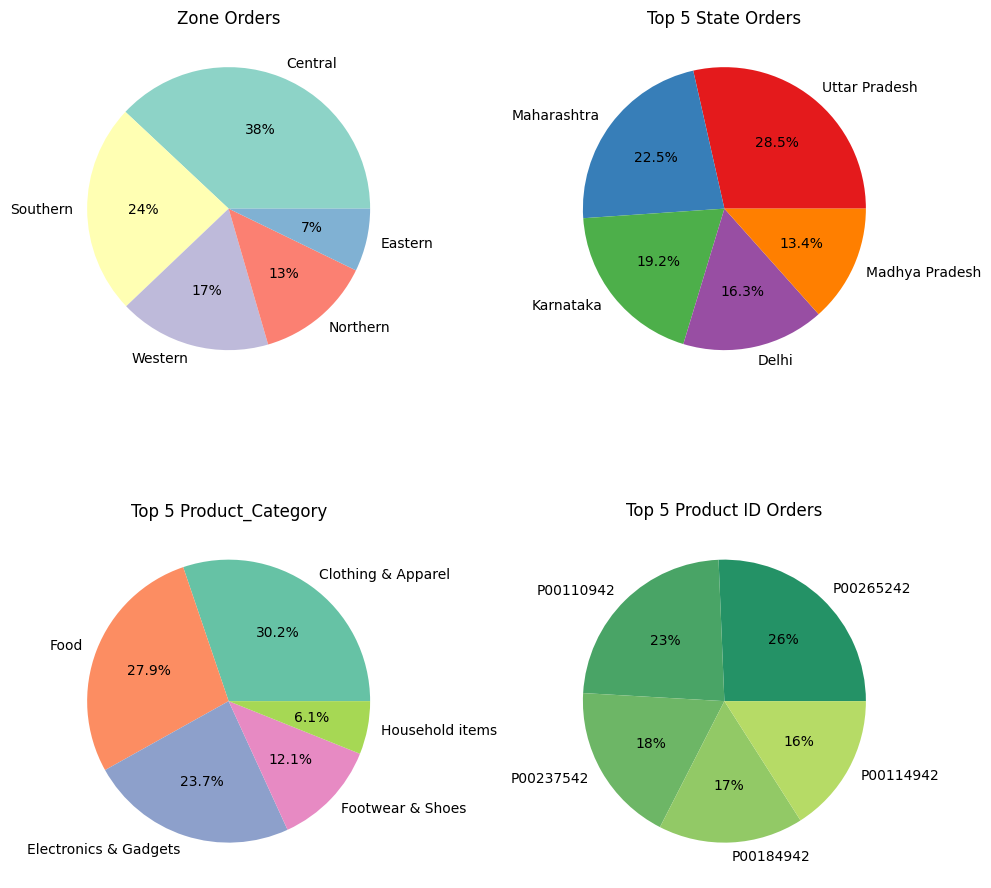

In [38]:
# Calculate the total amount for each category
total_order_zone = df.groupby('Zone')['Orders'].sum().sort_values(ascending=False)
total_order_state = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head()
total_order_category = df.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False).head()
total_order_ID = df.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).head()

# Create a new figure for the pie chart
plt.figure(figsize=(10, 10))

# Plotting pie chart for Zone vs Price
plt.subplot(2,2,1)
plt.pie(total_order_zone, labels=total_order_zone.index, autopct='%1.f%%', colors=sns.color_palette('Set3'))
plt.title('Zone Orders')

# Plotting pie chart for orders vs price
plt.subplot(2,2,2)
plt.pie(total_order_state, labels=total_order_state.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Top 5 State Orders')

# Plotting pie chart for Age Group vs Price
plt.subplot(2,2,3)
plt.pie(total_order_category, labels=total_order_category.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Top 5 Product_Category')

# Plotting pie chart for Gender vs Price
plt.subplot(2,2,4)
plt.pie(total_order_ID, labels=total_order_ID.index, autopct='%1.f%%', colors=sns.color_palette('summer'))
plt.title('Top 5 Product ID Orders')     

plt.tight_layout()
plt.show()   

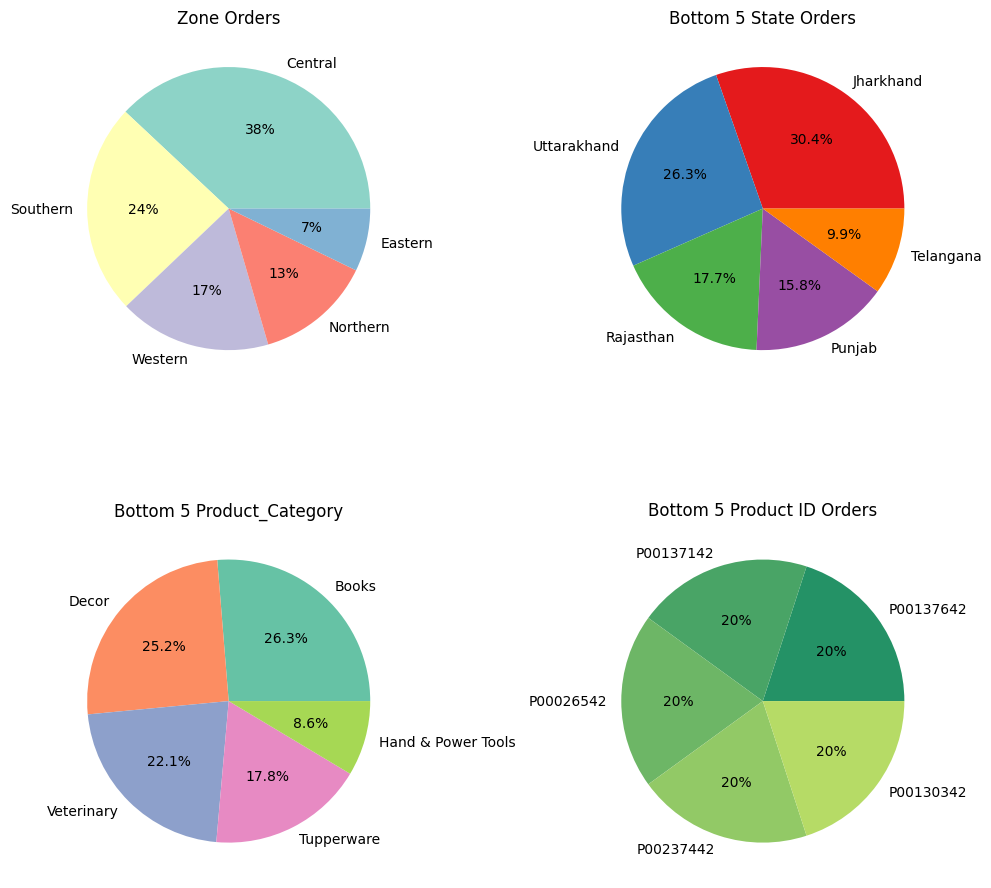

In [39]:
# Calculate the total amount for each category
total_order_zone = df.groupby('Zone')['Orders'].sum().sort_values(ascending=False)
total_order_state = df.groupby('State')['Orders'].sum().sort_values(ascending=False).tail()
total_order_category = df.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False).tail()
total_order_ID = df.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).tail()

# Create a new figure for the pie chart
plt.figure(figsize=(10, 10))

# Plotting pie chart for Zone vs Price
plt.subplot(2,2,1)
plt.pie(total_order_zone, labels=total_order_zone.index, autopct='%1.f%%', colors=sns.color_palette('Set3'))
plt.title('Zone Orders')

# Plotting pie chart for orders vs price
plt.subplot(2,2,2)
plt.pie(total_order_state, labels=total_order_state.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Bottom 5 State Orders')

# Plotting pie chart for Age Group vs Price
plt.subplot(2,2,3)
plt.pie(total_order_category, labels=total_order_category.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Bottom 5 Product_Category')

# Plotting pie chart for Gender vs Price
plt.subplot(2,2,4)
plt.pie(total_order_ID, labels=total_order_ID.index, autopct='%1.f%%', colors=sns.color_palette('summer'))
plt.title('Bottom 5 Product ID Orders')     

plt.tight_layout()
plt.show()

#### **Sales Analysis**

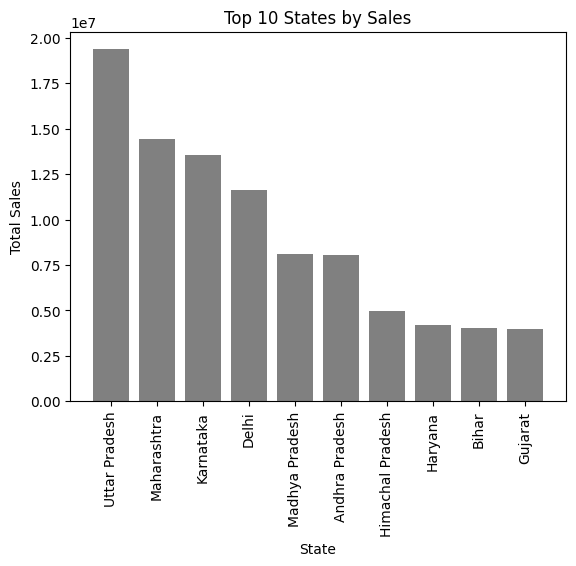

In [40]:
state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

plt.bar(state_sales.index, state_sales.values, color='grey')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Top 10 States by Sales')
plt.xticks(rotation=90)
plt.show()

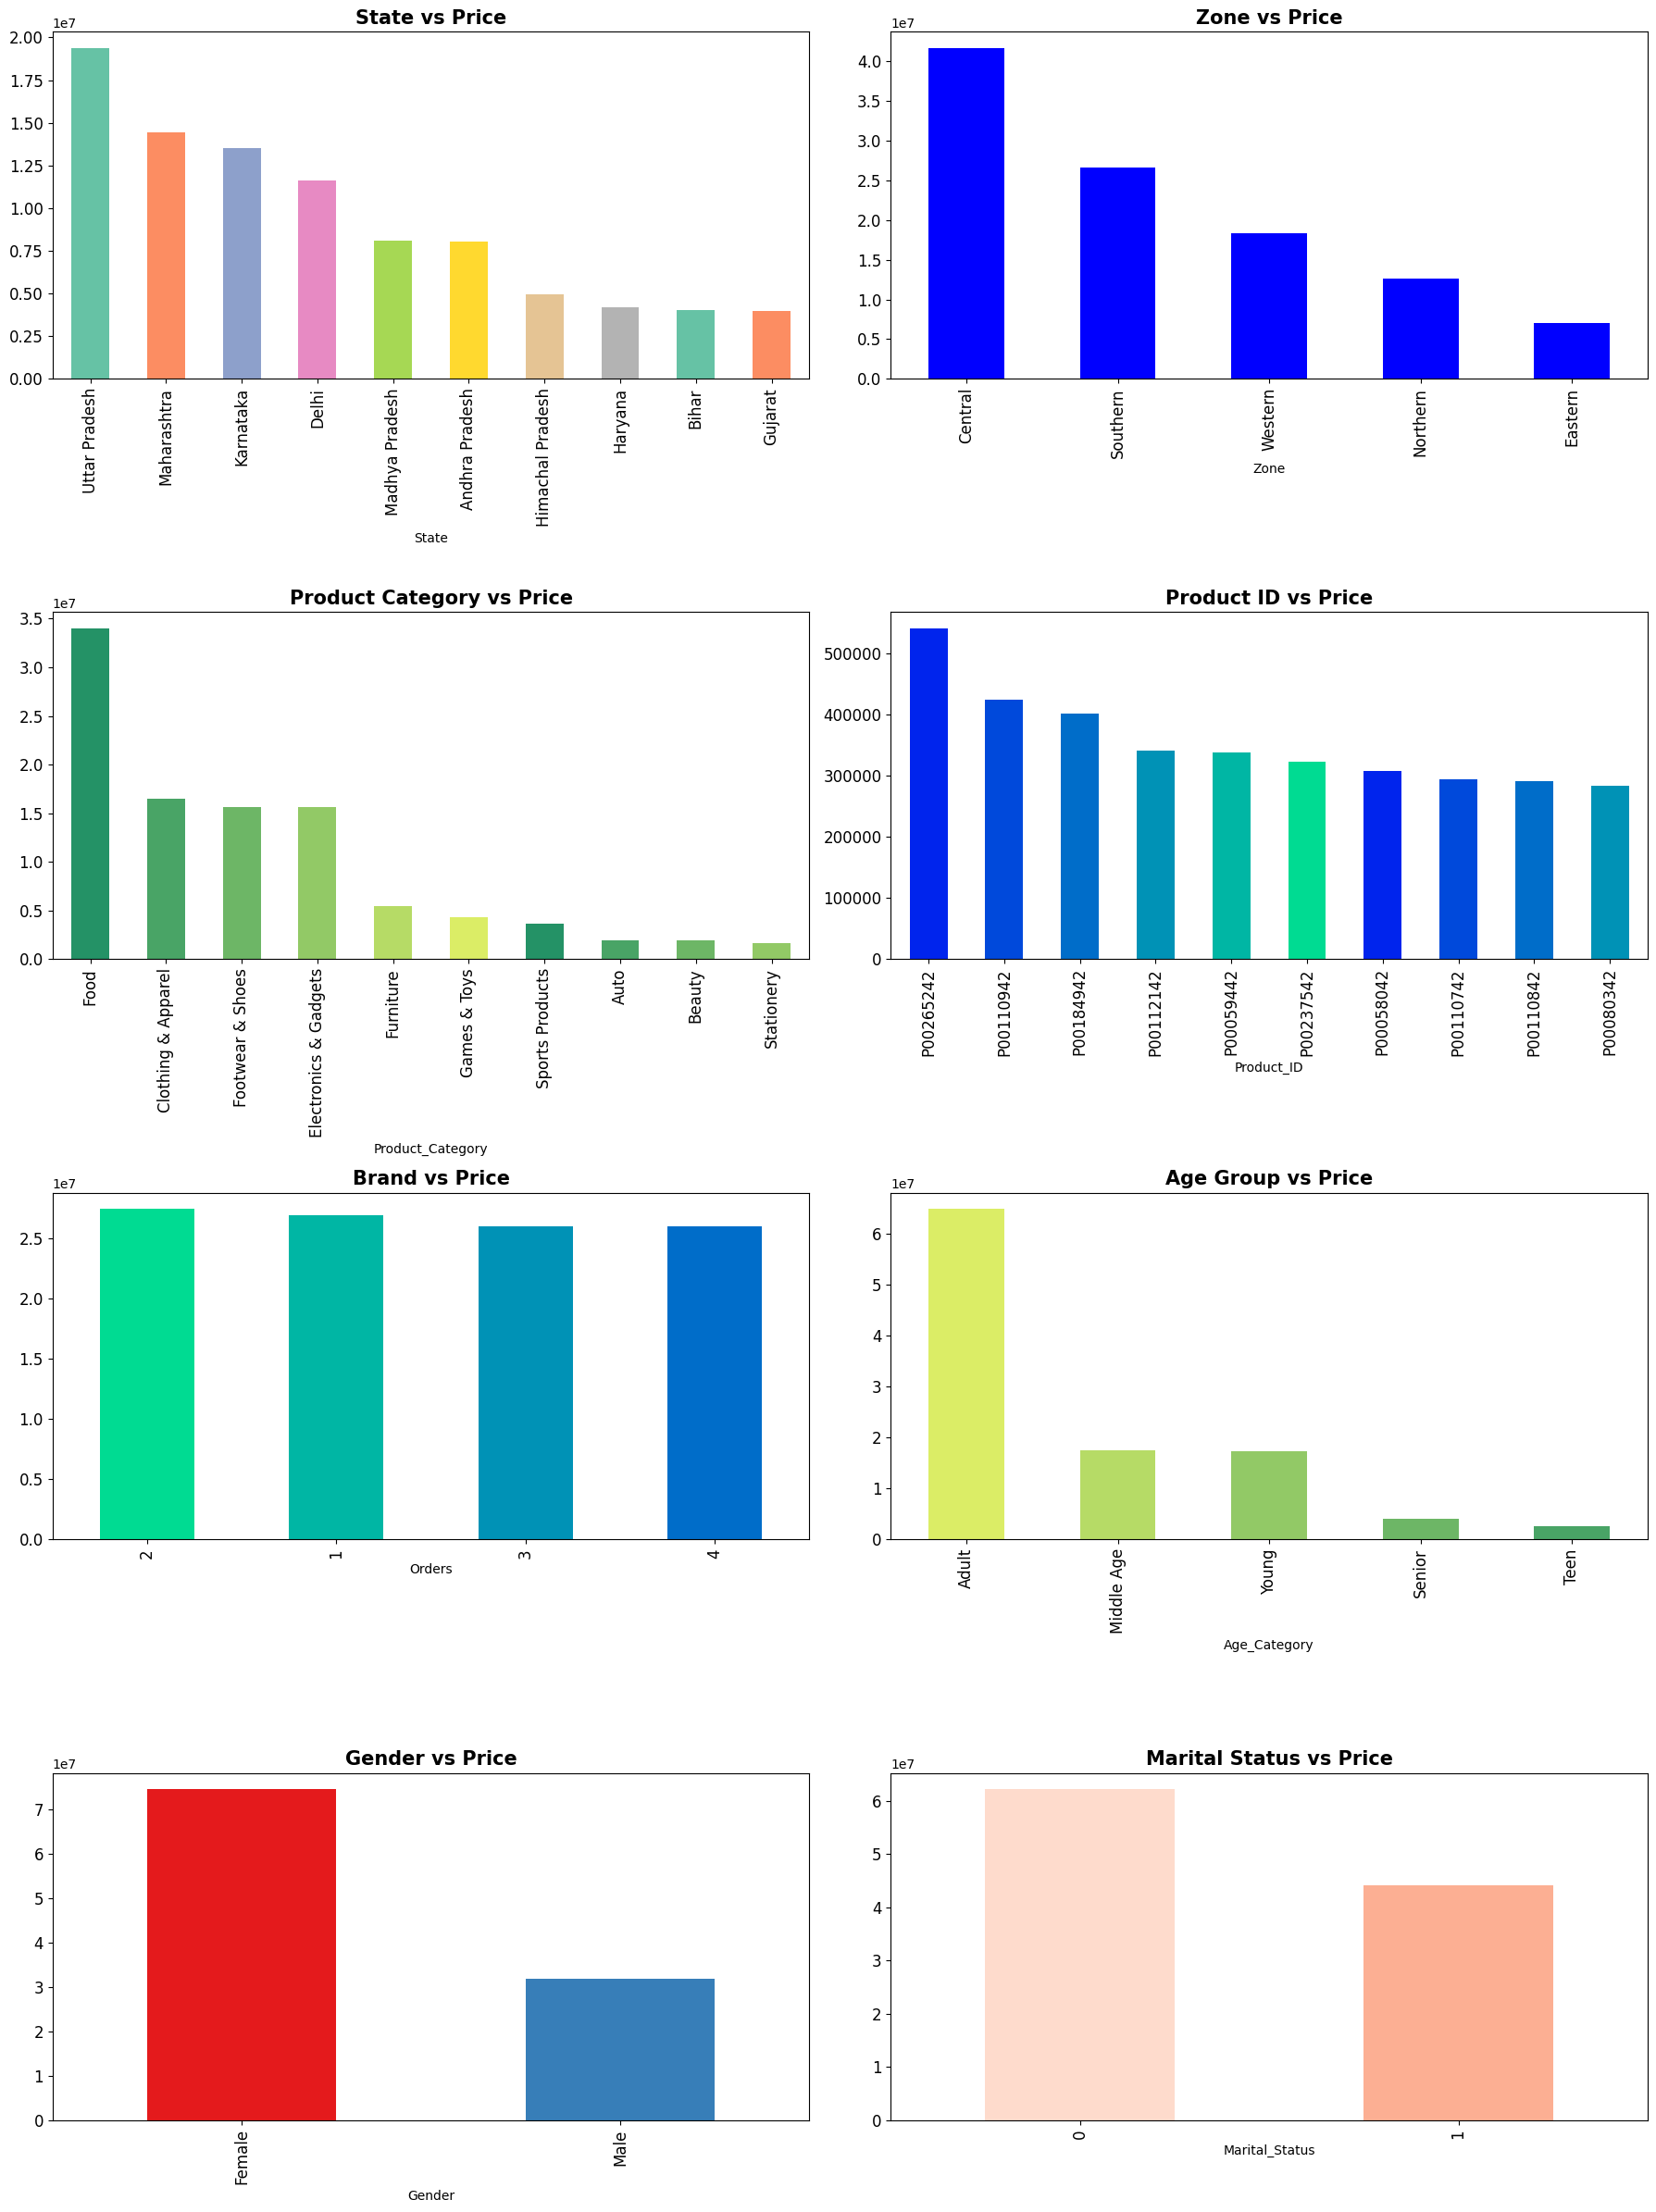

In [41]:
fig, axarr = plt.subplots(4, 2, figsize=(18, 24))

# State vs Price
df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[0][0], fontsize=12, color=sns.color_palette('Set2'))
axarr[0][0].set_title('State vs Price', fontsize=15, fontweight='bold')

# Zone vs Price
df.groupby('Zone')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[0][1], fontsize=12, color='blue')
axarr[0][1].set_title('Zone vs Price', fontsize=15, fontweight='bold')

# Product Category by Price
df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][0], fontsize=12, color=sns.color_palette('summer'))
axarr[1][0].set_title('Product Category vs Price', fontsize=15, fontweight='bold')

# Product ID by Price
df.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12, color=sns.color_palette('winter'))
axarr[1][1].set_title('Product ID vs Price', fontsize=15, fontweight='bold')

# Brand vs Price
df.groupby('Orders')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12, color=sns.color_palette('winter_r'))
axarr[2][0].set_title('Brand vs Price', fontsize=15, fontweight='bold')

# Age Group vs Price
df.groupby('Age_Category')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12, color=sns.color_palette('summer_r'))
axarr[2][1].set_title('Age Group vs Price', fontsize=15, fontweight='bold')

# Gender vs Price
df.groupby('Gender')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[3][0], fontsize=12, color=sns.color_palette('Set1'))
axarr[3][0].set_title('Gender vs Price', fontsize=15, fontweight='bold')

# Marital Status vs Price
df.groupby('Marital_Status')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[3][1], fontsize=12, color=sns.color_palette('Reds'))
axarr[3][1].set_title('Marital Status vs Price', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()